In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
import pandas as pd

In [33]:
#help(pd.read_csv)

In [24]:
halos_list_file = '/home/babyostrich/data/mxxl/snap41/halos_41.txt'
halos_list = pd.read_csv(halos_list_file,header=1,sep='\t',
                        )

In [25]:
halos_list.columns

Index([u'# Mass200', u'Radius200', u'Position_0', u'Position_1', u'Position_2',
       u'VirialRatio', u'CenterOfMassOffset', u'SubstructureFraction',
       u'EinastoParameter_0', u'EinastoParameter_1', u'EinastoParameter_2',
       u'HalfMassRadius', u'HalfMassFormationRedshift', u'SubhaloFileNumber',
       u'SubhaloFileOffset', u'EinastoMeanRhoR2', u'MeanRhorh',
       u'EinastoFormationRedshift'],
      dtype='object')

# Data check
Below, we do a quick check that the columns are aligned properly, and figure out units if needed

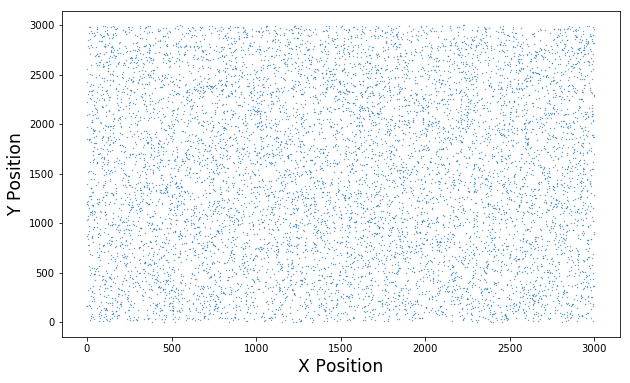

In [28]:
# Position in Mpc(?)
plt.scatter(halos_list['Position_0'][::100],halos_list['Position_1'][::100],s=0.1)
plt.xlabel('X Position',fontsize='xx-large')
plt.ylabel('Y Position',fontsize='xx-large')

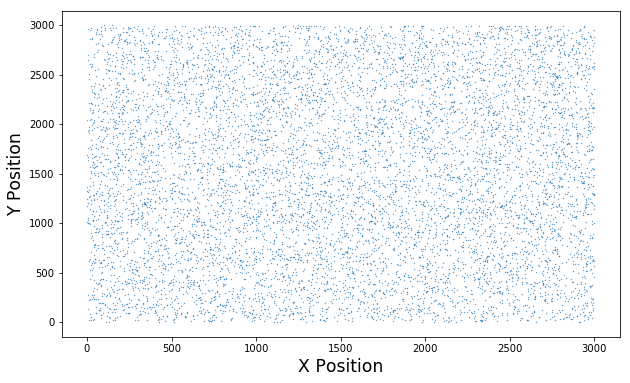

In [29]:
plt.scatter(halos_list['Position_1'][::100],halos_list['Position_2'][::100],s=0.1)
plt.xlabel('X Position',fontsize='xx-large')
plt.ylabel('Y Position',fontsize='xx-large')

Note: Need to find out units on below (either from Doug's code or from Stefan)

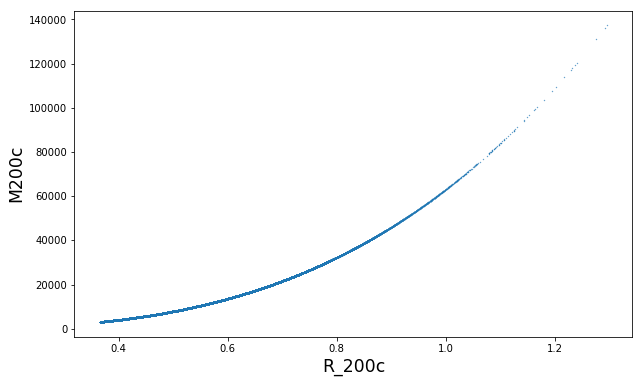

In [34]:
# Check units for mass and radius
plt.scatter(halos_list['Radius200'],halos_list['# Mass200'],s=0.1)
plt.xlabel('R_200c',fontsize='xx-large') # Radius in Mpc(?) or Mpc/h(?)
plt.ylabel('M200c',fontsize='xx-large')  # Mass in....(?)
#  Note to self: Cross check with the massive_halos_41.M_200crit.txt and 
#  massive_halos_41.M_200crit.cumulative_mass_function.txt

# Distribution of halos
Now, we'll check for the distribution of halos as a function of relaxedness criteria: 'VirialRatio', 'CenterOfMassOffset', 'SubstructureFraction'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e23d82450>]], dtype=object)

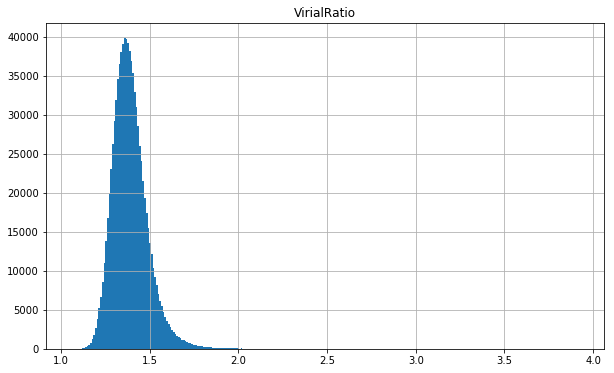

In [42]:
pd.DataFrame.hist(halos_list,column=['VirialRatio'],bins=300)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e23466810>]], dtype=object)

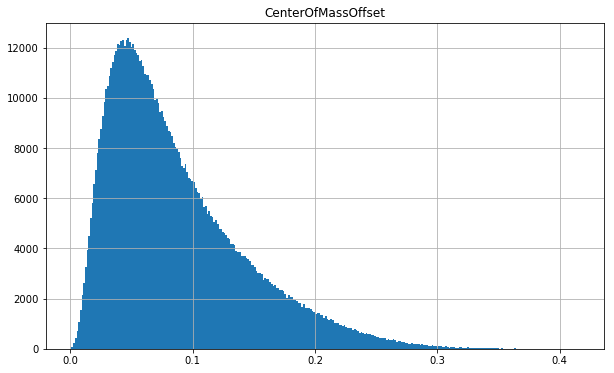

In [43]:
pd.DataFrame.hist(halos_list,column=['CenterOfMassOffset'],bins=300)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e23344890>]], dtype=object)

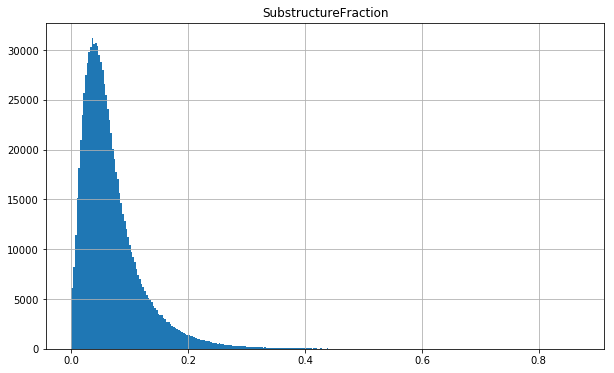

In [53]:
pd.DataFrame.hist(halos_list,column=['SubstructureFraction'],bins=300)

# Discussion of departures from equilibrium in Ludlow+12:
"As discussed by Neto et al. (2007), halo concentrations
can be affected by transient departures from equilibrium,
resulting in subtle biases in their mean mass dependence
and scatter. We therefore identify a subsample of
“relaxed” halos, as those that satisfy the following three criteria:
(i) fsub < 0.1, (ii) doff < 0.07 and (iii) 2T /|U| < 1.3.
Here fsub = Msub/M200 is the mass fraction contributed by
substructure; doff = |rp −rCM|/r200 is the offset between the position of the potential minimum and the halo barycenter,
expressed in units of the virial radius; and 2T /|U| is the
virial ratio of kinetic to potential energies."

In [47]:
# Define the criteria
fsub_crit = halos_list['SubstructureFraction'] < 0.1
doff_crit = halos_list['CenterOfMassOffset'] < 0.07
vir_crit = halos_list['VirialRatio'] < 1.3

In [64]:
def hist_with_criteria(df, column, criteria, bins=300) :
    pd.DataFrame.hist(df.loc[criteria],column=[column],bins=300)

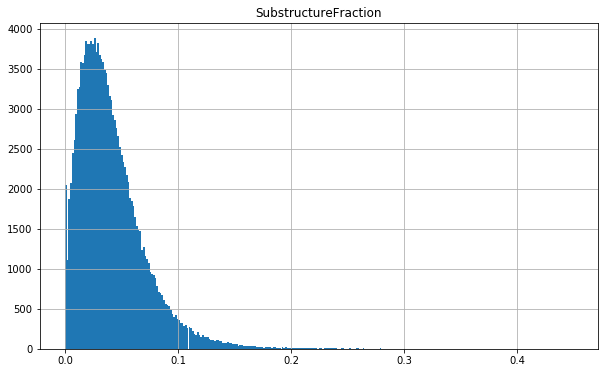

In [51]:
# Let's check how the distributions of the virial ratio
hist_with_criteria(halos_list, 'SubstructureFraction', vir_crit)

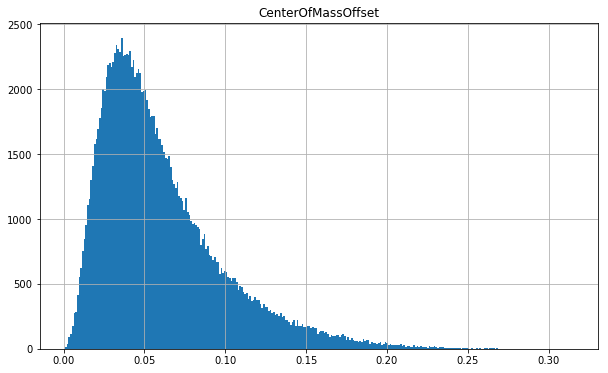

In [54]:
hist_with_criteria(halos_list, 'CenterOfMassOffset', vir_crit)

Let's look at how the combined doff and fsub criteria distributions look to see what we cannot remove without the virial ratio criterion

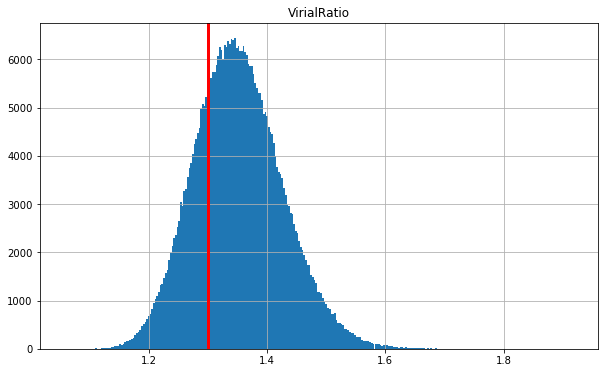

In [61]:
hist_with_criteria(halos_list, 'VirialRatio', fsub_crit&doff_crit )
plt.axvline(1.3,c='r',lw=3.0)

Now, let's look at the distributions with some mass or radius cut (still need to know the units!)

In [68]:
radius_cut_8 = halos_list['Radius200'] > 0.8
halos_list_8R200c = halos_list[radius_cut_8]

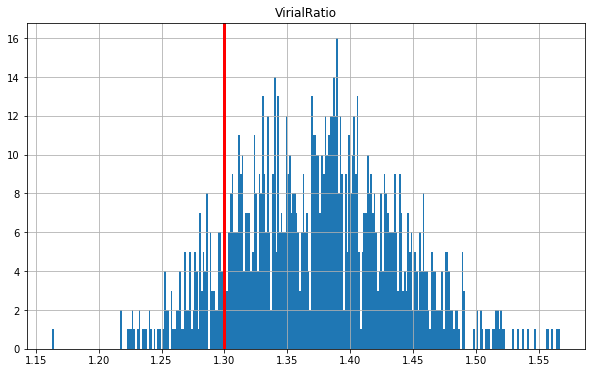

In [67]:
hist_with_criteria(halos_list_8R200c, 'VirialRatio', fsub_crit&doff_crit, bins=30 )
plt.axvline(1.3,c='r',lw=3.0)

In [69]:
radius_cut_6 = halos_list['Radius200'] > 0.6
halos_list_6R200c = halos_list[radius_cut_6]

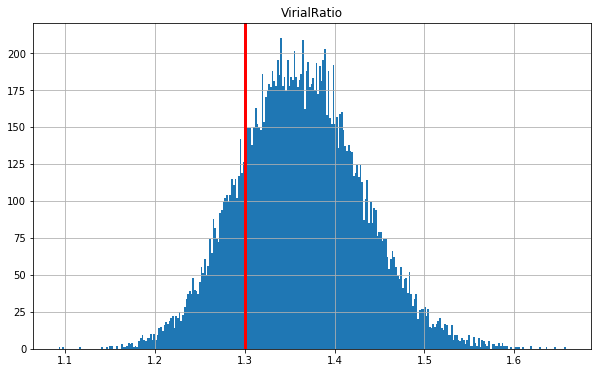

In [70]:
hist_with_criteria(halos_list_6R200c, 'VirialRatio', fsub_crit&doff_crit, bins=30 )
plt.axvline(1.3,c='r',lw=3.0)